TravClan Assignment - Sakshi Singh

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('C:\\Users\\91911\\OneDrive\\Documents\\Adobe\\Adobe Media Encoder\\TravClanAssignmentDataset.csv')
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,selling_price,payment_method,refund_status,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,25342,PayPal,Yes,369.648995,Web,Confirmed,2024-03-04,5.374694,0.000000,No
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,8033,Bank Transfer,Yes,492.505903,Web,Confirmed,2024-07-19,7.161033,0.000000,No
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,29715,Debit Card,Yes,0.000000,iOS,Confirmed,2024-03-22,0.000000,0.000000,No
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,44592,Bank Transfer,Yes,545.541516,Android,Confirmed,2024-11-24,7.932170,24.500442,Yes
4,40,5,Seattle,5,2024-04-01,NaN,NaN,Deluxe,1,Leisure,...,15873,Debit Card,Yes,211.367602,Web,Cancelled,2024-03-02,0.000000,0.000000,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         30000 non-null  int64  
 1   property_id         30000 non-null  int64  
 2   city                30000 non-null  object 
 3   star_rating         30000 non-null  int64  
 4   booking_date        30000 non-null  object 
 5   check_in_date       24532 non-null  object 
 6   check_out_date      24532 non-null  object 
 7   room_type           30000 non-null  object 
 8   num_rooms_booked    30000 non-null  int64  
 9   stay_type           30000 non-null  object 
 10  booking_channel     30000 non-null  object 
 11  booking_value       30000 non-null  float64
 12  costprice           30000 non-null  int64  
 13  markup              30000 non-null  int64  
 14  selling_price       30000 non-null  int64  
 15  payment_method      30000 non-null  object 
 16  refu

In [5]:
df.describe()

,customer_id,property_id,star_rating,num_rooms_booked,booking_value,costprice,markup,selling_price,refund_amount,cashback,coupon_redeem
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,249.721767,3.777533,3.602033,1.352333,25080.525454,22541.494100,6963.32440,29504.818500,320.938376,3.831534,4.134988
std,145.484836,2.081471,0.860241,0.574403,11587.369335,9259.520787,2860.10657,12119.627338,339.635396,4.783590,10.846221
min,1.000000,1.000000,2.000000,1.000000,1279.770000,3822.000000,1181.00000,5003.000000,0.000000,0.000000,-3.532183
25%,123.000000,1.000000,3.000000,1.000000,15922.712500,15088.750000,4661.75000,19750.500000,0.000000,0.000000,0.000000
50%,248.000000,3.000000,4.000000,1.000000,24736.145000,22731.000000,7021.50000,29752.500000,221.141185,1.030180,0.000000
75%,376.000000,5.000000,4.000000,2.000000,33570.000000,30427.000000,9399.00000,39826.000000,594.624344,7.378533,0.000000
max,499.000000,7.000000,5.000000,3.000000,67764.460000,38200.000000,11800.00000,50000.000000,1462.725105,21.268013,89.644917


In [6]:
df.isnull().sum()

customer_id              0
property_id              0
city                     0
star_rating              0
booking_date             0
check_in_date         5468
check_out_date        5468
room_type                0
num_rooms_booked         0
stay_type                0
booking_channel          0
booking_value            0
costprice                0
markup                   0
selling_price            0
payment_method           0
refund_status            0
refund_amount            0
channel_of_booking       0
booking_status           0
travel_date              0
cashback                 0
coupon_redeem            0
Coupon USed?             0
dtype: int64

In [8]:
print('Duplicate rows:',df.duplicated().sum())
df.drop_duplicates(inplace=True)

Duplicate rows: 0


In [9]:
missing = df.isnull().sum()
print('Missing values per column :\n', missing[missing > 0])

Missing values per column :
 check_in_date     5468
check_out_date    5468
dtype: int64


In [11]:
for col in df.columns:
    if 'date' in col.lower():
        df[col] = pd.to_datetime(df[col], errors='coerce')

print(df.dtypes)

customer_id                    int64
property_id                    int64
city                          object
star_rating                    int64
booking_date          datetime64[ns]
check_in_date         datetime64[ns]
check_out_date        datetime64[ns]
room_type                     object
num_rooms_booked               int64
stay_type                     object
booking_channel               object
booking_value                float64
costprice                      int64
markup                         int64
selling_price                  int64
payment_method                object
refund_status                 object
refund_amount                float64
channel_of_booking            object
booking_status                object
travel_date           datetime64[ns]
cashback                     float64
coupon_redeem                float64
Coupon USed?                  object
dtype: object


In [14]:
if 'check_in_date' in df.columns and 'check_out_date' in df.columns: 
    df['stay_length'] = (df['check_out_date'] - df['check_in_date']).dt.days 

if 'booking_date' in df.columns:
    df['booking_month'] = df['booking_date'].dt.month
    df['booking_year'] = df['booking_date'].dt.year

cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    df[col] = df[col].astype('category')

df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,stay_length,booking_month,booking_year
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,369.648995,Web,Confirmed,2024-03-04,5.374694,0.000000,No,2.0,4,2024
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,492.505903,Web,Confirmed,2024-07-19,7.161033,0.000000,No,7.0,4,2024
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,0.000000,iOS,Confirmed,2024-03-22,0.000000,0.000000,No,5.0,4,2024
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,545.541516,Android,Confirmed,2024-11-24,7.932170,24.500442,Yes,6.0,4,2024
4,40,5,Seattle,5,2024-04-01,NaT,NaT,Deluxe,1,Leisure,...,211.367602,Web,Cancelled,2024-03-02,0.000000,0.000000,No,NaN,4,2024


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   customer_id         30000 non-null  int64         
 1   property_id         30000 non-null  int64         
 2   city                30000 non-null  category      
 3   star_rating         30000 non-null  int64         
 4   booking_date        30000 non-null  datetime64[ns]
 5   check_in_date       24532 non-null  datetime64[ns]
 6   check_out_date      24532 non-null  datetime64[ns]
 7   room_type           30000 non-null  category      
 8   num_rooms_booked    30000 non-null  int64         
 9   stay_type           30000 non-null  category      
 10  booking_channel     30000 non-null  category      
 11  booking_value       30000 non-null  float64       
 12  costprice           30000 non-null  int64         
 13  markup              30000 non-null  int64     

In [27]:
df.isnull().sum(0)

customer_id              0
property_id              0
city                     0
star_rating              0
booking_date             0
check_in_date         5468
check_out_date        5468
room_type                0
num_rooms_booked         0
stay_type                0
booking_channel          0
booking_value            0
costprice                0
markup                   0
selling_price            0
payment_method           0
refund_status            0
refund_amount            0
channel_of_booking       0
booking_status           0
travel_date              0
cashback                 0
coupon_redeem            0
Coupon USed?             0
stay_length           5468
booking_month            0
booking_year             0
dtype: int64

In [30]:
df['check_in_date'] = df['check_in_date'].fillna(0)
df['check_out_date'] = df['check_out_date'].fillna(0)

df['stay_length'] = df['stay_length'].fillna(df['stay_length'].mean())


In [31]:
df.isnull().sum()

customer_id           0
property_id           0
city                  0
star_rating           0
booking_date          0
check_in_date         0
check_out_date        0
room_type             0
num_rooms_booked      0
stay_type             0
booking_channel       0
booking_value         0
costprice             0
markup                0
selling_price         0
payment_method        0
refund_status         0
refund_amount         0
channel_of_booking    0
booking_status        0
travel_date           0
cashback              0
coupon_redeem         0
Coupon USed?          0
stay_length           0
booking_month         0
booking_year          0
dtype: int64

In [34]:
df['refund_amount'] = df['refund_amount'].round(2)
df['cashback'] = df['cashback'].round(2)
df['coupon_redeem'] = df['coupon_redeem'].round(2)


In [35]:
df.head()

,serial_number,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,...,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,Coupon USed?,stay_length,booking_month,booking_year
0,1,492,3,San Francisco,4,2024-04-01,2024-05-24 00:00:00,2024-05-26 00:00:00,Standard,1,...,369.65,Web,Confirmed,2024-03-04,5.37,0.0,No,2.000000,4,2024
1,2,180,3,Dallas,3,2024-04-01,2024-05-10 00:00:00,2024-05-17 00:00:00,Deluxe,1,...,492.51,Web,Confirmed,2024-07-19,7.16,0.0,No,7.000000,4,2024
2,3,50,5,Dallas,3,2024-04-01,2024-05-31 00:00:00,2024-06-05 00:00:00,Deluxe,1,...,0.00,iOS,Confirmed,2024-03-22,0.00,0.0,No,5.000000,4,2024
3,4,294,3,Orlando,4,2024-04-01,2024-04-18 00:00:00,2024-04-24 00:00:00,Deluxe,3,...,545.54,Android,Confirmed,2024-11-24,7.93,24.5,Yes,6.000000,4,2024
4,5,40,5,Seattle,5,2024-04-01,0,0,Deluxe,1,...,211.37,Web,Cancelled,2024-03-02,0.00,0.0,No,4.006848,4,2024


In [51]:
df.rename(columns={'Coupon USed?': 'coupon_used'}, inplace=True)

df['coupon_used'] = df['coupon_used'].astype(str).str.capitalize()

In [45]:
df['stay_length'] = df['stay_length'].astype(int)

In [46]:
import calendar
df['booking_month'] = df['booking_month'].apply(lambda x: calendar.month_name[int(x)] if not pd.isnull(x) else x)

In [52]:
df.head()

,serial_number,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,...,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,coupon_used,stay_length,booking_month,booking_year
0,1,492,3,San Francisco,4,2024-04-01,2024-05-24 00:00:00,2024-05-26 00:00:00,Standard,1,...,369.65,Web,Confirmed,2024-03-04,5.37,0.0,No,2,April,2024
1,2,180,3,Dallas,3,2024-04-01,2024-05-10 00:00:00,2024-05-17 00:00:00,Deluxe,1,...,492.51,Web,Confirmed,2024-07-19,7.16,0.0,No,7,April,2024
2,3,50,5,Dallas,3,2024-04-01,2024-05-31 00:00:00,2024-06-05 00:00:00,Deluxe,1,...,0.00,iOS,Confirmed,2024-03-22,0.00,0.0,No,5,April,2024
3,4,294,3,Orlando,4,2024-04-01,2024-04-18 00:00:00,2024-04-24 00:00:00,Deluxe,3,...,545.54,Android,Confirmed,2024-11-24,7.93,24.5,Yes,6,April,2024
4,5,40,5,Seattle,5,2024-04-01,0,0,Deluxe,1,...,211.37,Web,Cancelled,2024-03-02,0.00,0.0,No,4,April,2024


In [53]:
df['check_in_date'] = pd.to_datetime(df['check_in_date']).dt.date
df['check_out_date'] = pd.to_datetime(df['check_out_date']).dt.date

In [55]:
df.head()

,serial_number,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,...,refund_amount,channel_of_booking,booking_status,travel_date,cashback,coupon_redeem,coupon_used,stay_length,booking_month,booking_year
0,1,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,...,369.65,Web,Confirmed,2024-03-04,5.37,0.0,No,2,April,2024
1,2,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,...,492.51,Web,Confirmed,2024-07-19,7.16,0.0,No,7,April,2024
2,3,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,...,0.00,iOS,Confirmed,2024-03-22,0.00,0.0,No,5,April,2024
3,4,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,...,545.54,Android,Confirmed,2024-11-24,7.93,24.5,Yes,6,April,2024
4,5,40,5,Seattle,5,2024-04-01,1970-01-01,1970-01-01,Deluxe,1,...,211.37,Web,Cancelled,2024-03-02,0.00,0.0,No,4,April,2024


In [57]:
df.drop(['travel_date'], axis=1, inplace=True)

In [58]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,refund_status,refund_amount,channel_of_booking,booking_status,cashback,coupon_redeem,coupon_used,stay_length,booking_month,booking_year
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,Yes,369.65,Web,Confirmed,5.37,0.0,No,2,April,2024
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,Yes,492.51,Web,Confirmed,7.16,0.0,No,7,April,2024
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,Yes,0.00,iOS,Confirmed,0.00,0.0,No,5,April,2024
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,Yes,545.54,Android,Confirmed,7.93,24.5,Yes,6,April,2024
4,40,5,Seattle,5,2024-04-01,1970-01-01,1970-01-01,Deluxe,1,Leisure,...,Yes,211.37,Web,Cancelled,0.00,0.0,No,4,April,2024


In [69]:
df['advance_booking_days'] = (pd.to_datetime(df['check_in_date']) - pd.to_datetime(df['booking_date'])).dt.days

df['advance_booking_days'] = np.where(
    df['booking_status'].str.lower() == 'confirmed',
    (pd.to_datetime(df['check_in_date']) - pd.to_datetime(df['booking_date'])).dt.days,
    0
)

df['advance_booking_days'] = df['advance_booking_days'].astype('Int64')

In [70]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,refund_amount,channel_of_booking,booking_status,cashback,coupon_redeem,coupon_used,stay_length,booking_month,booking_year,advance_booking_days
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,369.65,Web,Confirmed,5.37,0.0,No,2,April,2024,53
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,492.51,Web,Confirmed,7.16,0.0,No,7,April,2024,39
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,0.00,iOS,Confirmed,0.00,0.0,No,5,April,2024,60
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,545.54,Android,Confirmed,7.93,24.5,Yes,6,April,2024,17
4,40,5,Seattle,5,2024-04-01,1970-01-01,1970-01-01,Deluxe,1,Leisure,...,211.37,Web,Cancelled,0.00,0.0,No,4,April,2024,0


In [71]:
df.isnull().sum()

customer_id             0
property_id             0
city                    0
star_rating             0
booking_date            0
check_in_date           0
check_out_date          0
room_type               0
num_rooms_booked        0
stay_type               0
booking_channel         0
booking_value           0
costprice               0
markup                  0
selling_price           0
payment_method          0
refund_status           0
refund_amount           0
channel_of_booking      0
booking_status          0
cashback                0
coupon_redeem           0
coupon_used             0
stay_length             0
booking_month           0
booking_year            0
advance_booking_days    0
dtype: int64

In [ ]:

print(df['booking_channel'].value_counts())
print(df['room_type'].value_counts())
print(df['star_rating'].value_counts())

booking_channel
Web             15001
Mobile App      12009
Travel Agent     2990
Name: count, dtype: int64
room_type
Standard    16552
Deluxe      10478
Suite        2970
Name: count, dtype: int64
star_rating
4    12034
3    10460
5     4511
2     2995
Name: count, dtype: int64


In [ ]:

df['booking_dayofweek'] = pd.to_datetime(df['booking_date']).dt.day_name()
df['checkin_dayofweek'] = pd.to_datetime(df['check_in_date']).dt.day_name()


In [74]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,cashback,coupon_redeem,coupon_used,stay_length,booking_month,booking_year,advance_booking_days,booking_dayofweek,checkin_dayofweek,booking_week
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,5.37,0.0,No,2,April,2024,53,Monday,Friday,14
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,7.16,0.0,No,7,April,2024,39,Monday,Friday,14
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,0.00,0.0,No,5,April,2024,60,Monday,Friday,14
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,7.93,24.5,Yes,6,April,2024,17,Monday,Thursday,14
4,40,5,Seattle,5,2024-04-01,1970-01-01,1970-01-01,Deluxe,1,Leisure,...,0.00,0.0,No,4,April,2024,0,Monday,Thursday,14


In [80]:
df['cost_per_day'] = df['booking_value'] / df['stay_length'].replace(0, 0)

df['cost_per_day'] = df['cost_per_day'].round(2)

In [81]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,coupon_redeem,coupon_used,stay_length,booking_month,booking_year,advance_booking_days,booking_dayofweek,checkin_dayofweek,booking_week,cost_per_day
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,0.0,No,2,April,2024,53,Monday,Friday,14,9680.500000
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,0.0,No,7,April,2024,39,Monday,Friday,14,876.714286
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,0.0,No,5,April,2024,60,Monday,Friday,14,4540.400000
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,24.5,Yes,6,April,2024,17,Monday,Thursday,14,5678.000000
4,40,5,Seattle,5,2024-04-01,1970-01-01,1970-01-01,Deluxe,1,Leisure,...,0.0,No,4,April,2024,0,Monday,Thursday,14,3031.750000


In [ ]:
# Count the number of cancellations per booking channel
if 'booking_status' in df.columns and 'booking_channel' in df.columns:
    cancelled_counts = df[df['booking_status'] == 'Cancelled']['booking_channel'].value_counts()
    print(cancelled_counts)

# Count the number of cancellations per room type
if 'booking_status' in df.columns and 'room_type' in df.columns:
    cancelled_room_counts = df[df['booking_status'] == 'Cancelled']['room_type'].value_counts()
    print(cancelled_room_counts)

# Count the number of cancellations per star rating
if 'booking_status' in df.columns and 'star_rating' in df.columns:
    cancelled_star_counts = df[df['booking_status'] == 'Cancelled']['star_rating'].value_counts()
    print(cancelled_star_counts)

booking_channel
Web             2646
Mobile App      2589
Travel Agent     835
Name: count, dtype: int64
room_type
Standard    3857
Deluxe      1679
Suite        534
Name: count, dtype: int64
star_rating
4    2406
3    2113
5     959
2     592
Name: count, dtype: int64


C:\Users\91911\AppData\Local\Temp\ipykernel_20088\2867908251.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_channel = df.groupby(['customer_id', 'booking_channel']).size().unstack(fill_value=0)


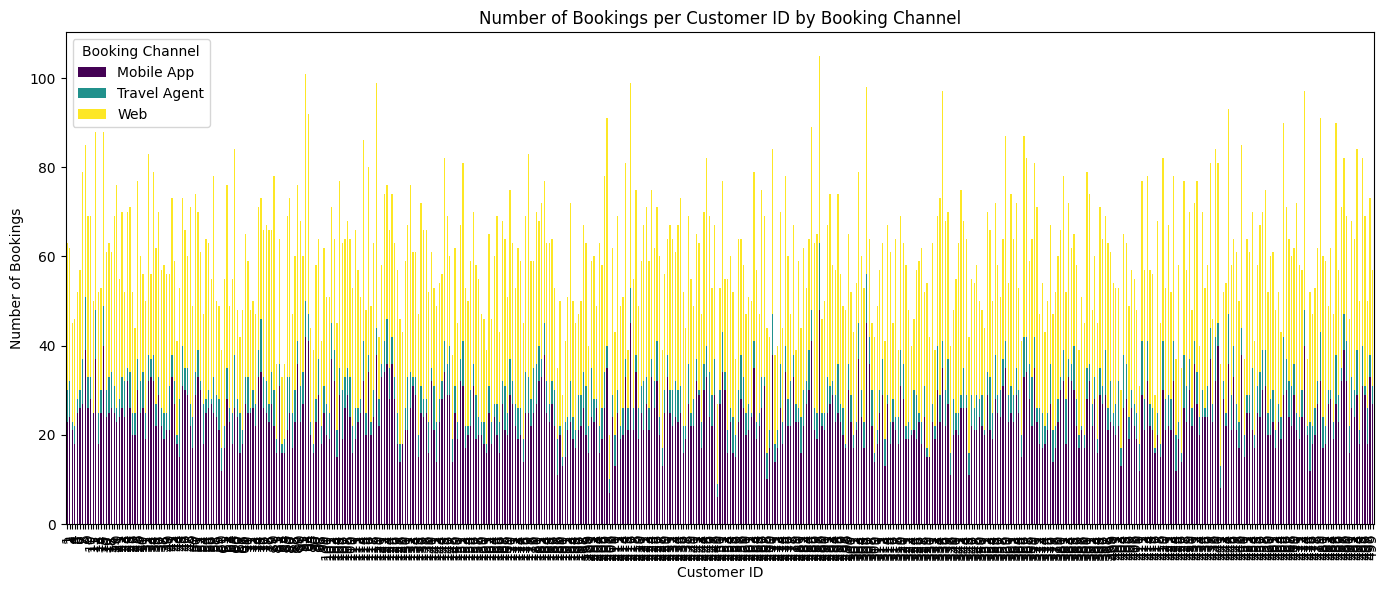

In [175]:
# Histogram: Number of bookings per customer_id, colored by booking_channel
if 'customer_id' in df.columns and 'booking_channel' in df.columns:
    booking_channel = df.groupby(['customer_id', 'booking_channel']).size().unstack(fill_value=0)
    booking_channel.plot(kind='bar', stacked=True, figsize=(14,6), colormap='viridis')
    plt.title('Number of Bookings per Customer ID by Booking Channel')
    plt.xlabel('Customer ID')
    plt.ylabel('Number of Bookings')
    plt.legend(title='Booking Channel')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'customer_id' and/or 'booking_channel' not found in the dataset.")

C:\Users\91911\AppData\Local\Temp\ipykernel_20088\2861404056.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_room = df.groupby(['customer_id', 'room_type']).size().unstack(fill_value=0)


C:\Users\91911\AppData\Local\Temp\ipykernel_20088\2861404056.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_room = df.groupby(['customer_id', 'room_type']).size().unstack(fill_value=0)


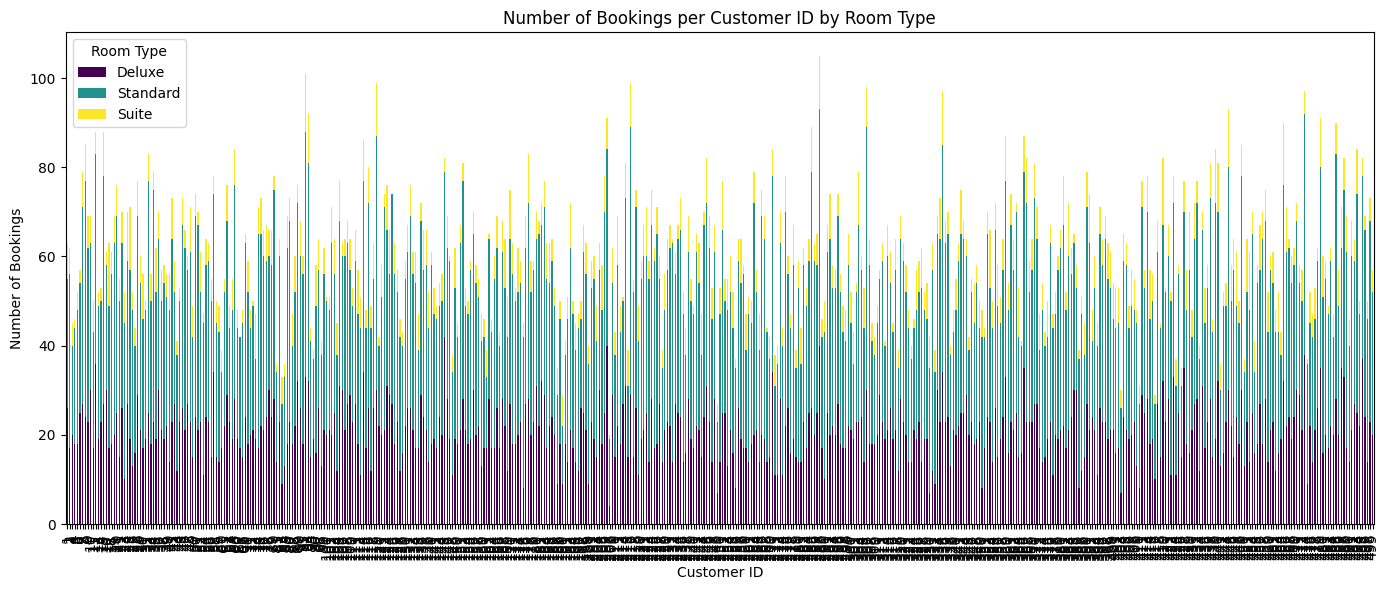

In [167]:
# Histogram: Number of bookings per customer_id, colored by room_type
if 'customer_id' in df.columns and 'room_type' in df.columns:
    booking_room = df.groupby(['customer_id', 'room_type']).size().unstack(fill_value=0)
    booking_room.plot(kind='bar', stacked=True, figsize=(14,6), colormap='viridis')
    plt.title('Number of Bookings per Customer ID by Room Type')
    plt.xlabel('Customer ID')
    plt.ylabel('Number of Bookings')
    plt.legend(title='Room Type')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'customer_id' and/or 'room_type' not found in the dataset.")

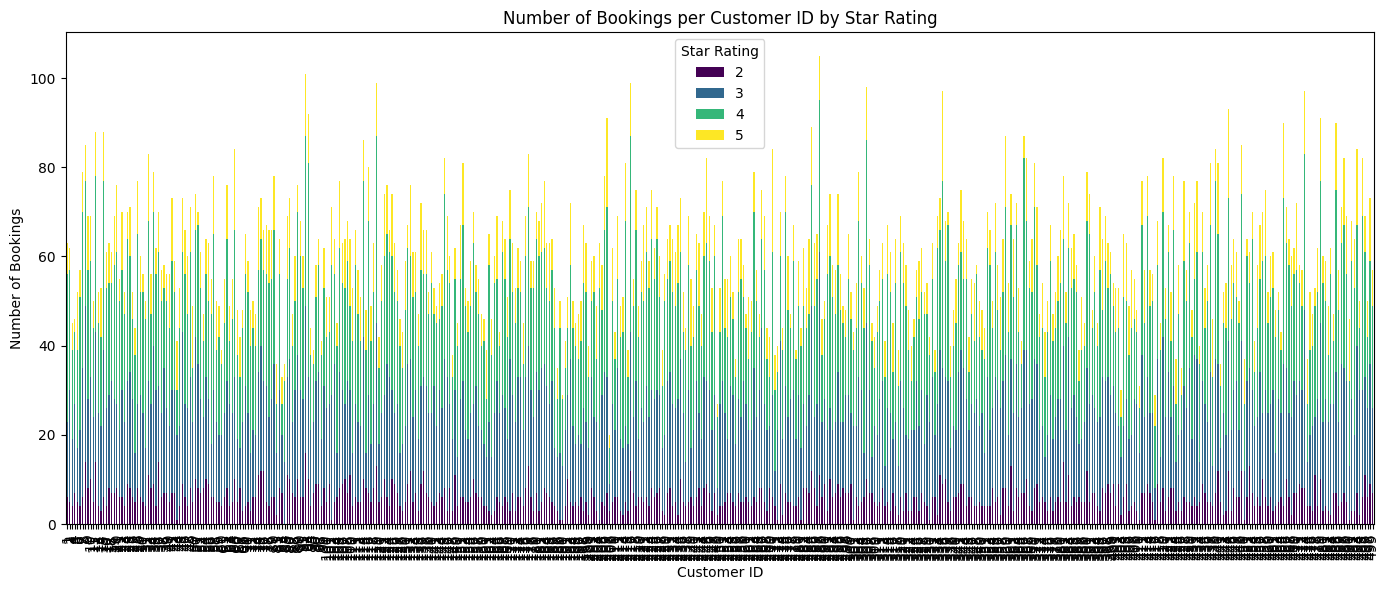

In [177]:
# Histogram: Number of bookings per customer_id, colored by star_rating
if 'customer_id' in df.columns and 'star_rating' in df.columns:
    booking_star = df.groupby(['customer_id', 'star_rating']).size().unstack(fill_value=0)
    booking_star.plot(kind='bar', stacked=True, figsize=(14,6), colormap='viridis')
    plt.title('Number of Bookings per Customer ID by Star Rating')
    plt.xlabel('Customer ID')
    plt.ylabel('Number of Bookings')
    plt.legend(title='Star Rating')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'customer_id' and/or 'star_rating' not found in the dataset.")

In [130]:
# Row-wise analysis: Impact of coupon_used on cancellation rate
if 'booking_status' in df.columns and 'coupon_used' in df.columns:
    coupon_cancel_rate = df[df['booking_status'] == 'Cancelled']['coupon_used'].value_counts()
    print("Cancellations by coupon_used value:")
    print(coupon_cancel_rate)

# Row-wise analysis: Impact of cashback on cancellation rate 
if 'booking_status' in df.columns and 'cashback' in df.columns:
    cashback_bins = pd.cut(df['cashback'], bins=5)
    cashback_cancel_rate = df[df['booking_status'] == 'Cancelled'].groupby(cashback_bins).size()
    print("\nCancellations by cashback amount (binned):")
    print(cashback_cancel_rate)

Cancellations by coupon_used value:
coupon_used
No     4782
Yes    1288
Name: count, dtype: int64

Cancellations by cashback amount (binned):
cashback
(-0.0213, 4.254]    3716
(4.254, 8.508]      1044
(8.508, 12.762]      929
(12.762, 17.016]     343
(17.016, 21.27]       38
dtype: int64


C:\Users\91911\AppData\Local\Temp\ipykernel_20088\504305269.py:11: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cashback_cancel_rate = df[df['booking_status'] == 'Cancelled'].groupby(cashback_bins).size()


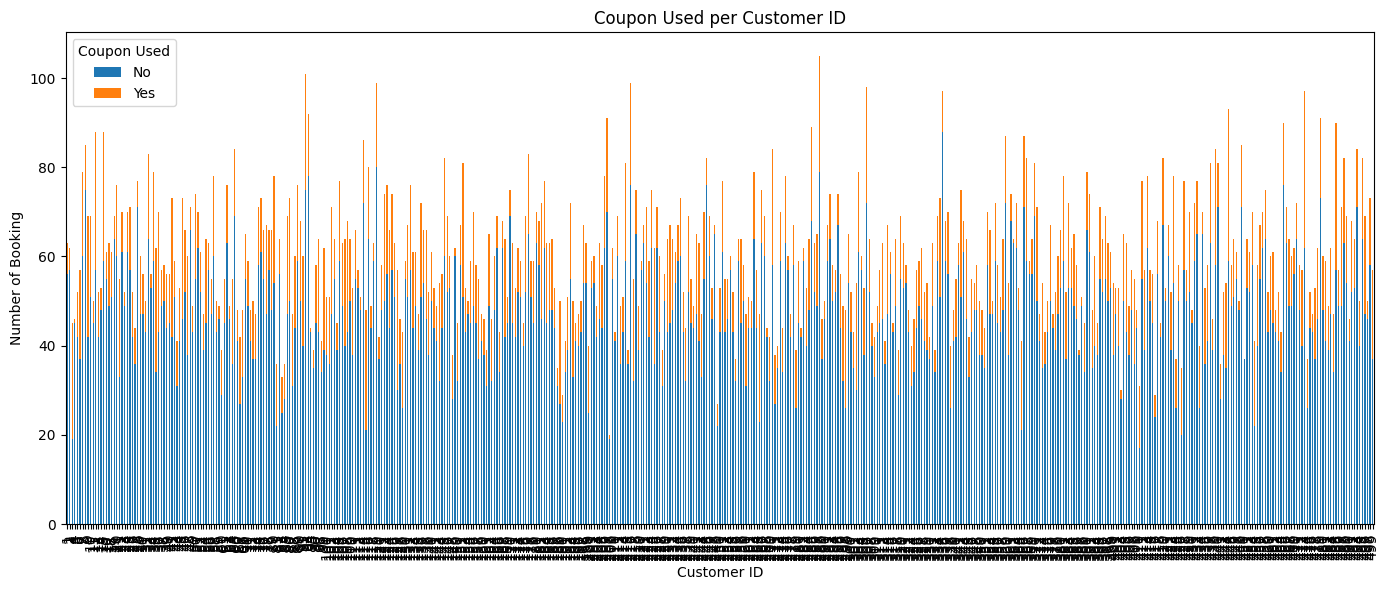

In [ ]:
# Histogram: Number of Booking per Customer_id by Coupon used
if 'customer_id' in df.columns and 'coupon_used' in df.columns:
    booking_coupon = df.groupby(['customer_id', 'coupon_used']).size().unstack(fill_value=0)
    booking_coupon.plot(kind='bar', stacked=True, figsize=(14,6))
    plt.title('Coupon Used per Customer ID')
    plt.xlabel('Customer ID')
    plt.ylabel('Number of Booking')
    plt.legend(title='Coupon Used')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'customer_id' and/or 'coupon_used' not found in the dataset.")

C:\Users\91911\AppData\Local\Temp\ipykernel_20088\2848795766.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_cashback = df.groupby(['customer_id', cashback_bins]).size().unstack(fill_value=0)


C:\Users\91911\AppData\Local\Temp\ipykernel_20088\2848795766.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  booking_cashback = df.groupby(['customer_id', cashback_bins]).size().unstack(fill_value=0)


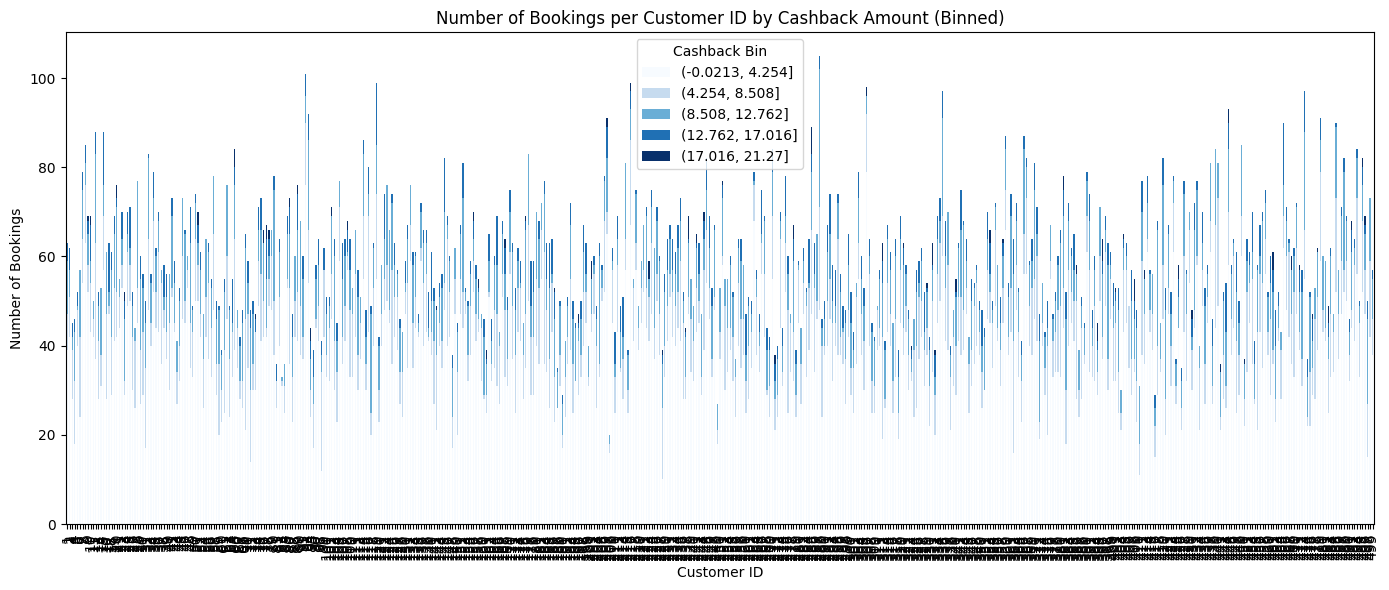

In [157]:
# Histogram: Number of bookings per customer_id, colored by cashback bins
if 'customer_id' in df.columns and 'cashback' in df.columns:
    cashback_bins = pd.cut(df['cashback'], bins=5)
    booking_cashback = df.groupby(['customer_id', cashback_bins]).size().unstack(fill_value=0)
    booking_cashback.plot(kind='bar', stacked=True, figsize=(14,6), colormap='Blues')
    plt.title('Number of Bookings per Customer ID by Cashback Amount (Binned)')
    plt.xlabel('Customer ID')
    plt.ylabel('Number of Bookings')
    plt.legend(title='Cashback Bin')
    plt.tight_layout()
    plt.show()
else:
    print("Required columns 'customer_id' and/or 'cashback' not found in the dataset.")

In [ ]:
# month with the highest and lowest number of stays
if 'booking_month' in df.columns:
    month_counts = df['booking_month'].value_counts()
    print("Month with highest number of stays:", month_counts.idxmax())
    print("Month with lowest number of stays:", month_counts.idxmin())
    print("\nNumber of stays in each month:")
    for month, count in month_counts.items():
        print(f"{month}: {int(count)}")
    plt.show()

Month with highest number of stays: April
Month with lowest number of stays: February

Number of stays in each month:
April: 4494
July: 2361
May: 2360
August: 2360
March: 2360
October: 2360
January: 2360
December: 2360
November: 2285
June: 2284
September: 2284
February: 2132


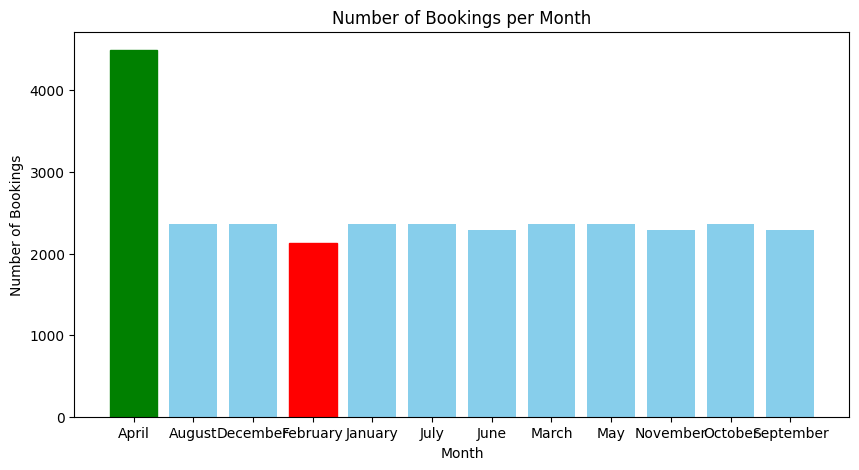

In [ ]:
# Histogram for Number of bookings per month 
if 'booking_month' in df.columns:
    month_counts = df['booking_month'].value_counts().sort_index()
    plt.figure(figsize=(10,5))
    bars = plt.bar(month_counts.index, month_counts.values, color='skyblue')
    # Highlight highest and lowest
    max_idx = month_counts.values.argmax()
    min_idx = month_counts.values.argmin()
    bars[max_idx].set_color('green')
    bars[min_idx].set_color('red')
    plt.title('Number of Bookings per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Bookings')
    
    plt.show()
else:
    print('booking_month column not found.')

In [ ]:
# Analysis:highest and lowest number of cancellations
if 'booking_month' in df.columns and 'booking_status' in df.columns:
    cancelled = df[df['booking_status'].str.lower() == 'cancelled']
    cancel_counts = cancelled['booking_month'].value_counts()
    if not cancel_counts.empty:
        print("Month with highest number of cancellations:", cancel_counts.idxmax())
        print("Month with lowest number of cancellations:", cancel_counts.idxmin())
        print("\nNumber of cancellations in each month:")
        for month, count in cancel_counts.items():
            print(f"{month}: {int(count)}")
    else:
        print("No cancellations found in the data.")

Month with highest number of cancellations: April
Month with lowest number of cancellations: November

Number of cancellations in each month:
April: 733
July: 716
August: 679
December: 608
January: 559
March: 415
October: 410
May: 408
September: 405
June: 400
February: 373
November: 364


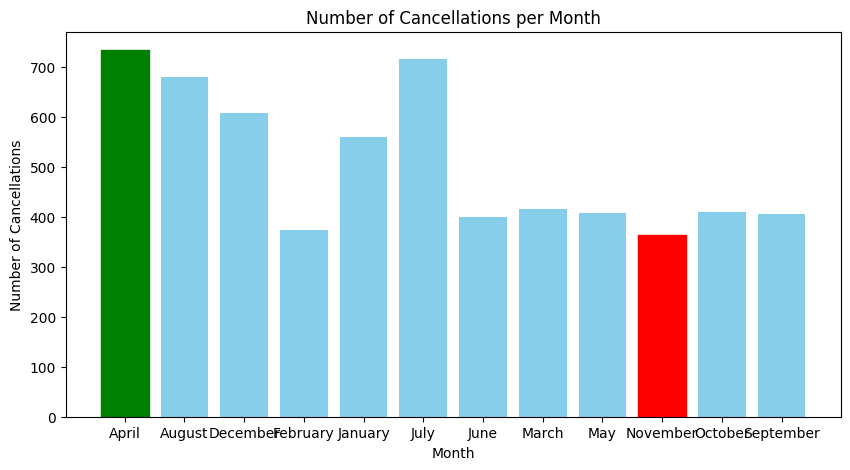

In [ ]:
# Histogram for cancellations per month 
if 'booking_month' in df.columns and 'booking_status' in df.columns:
    cancelled = df[df['booking_status'].str.lower() == 'cancelled']
    cancel_counts = cancelled['booking_month'].value_counts().sort_index()
    plt.figure(figsize=(10,5))
    bars = plt.bar(cancel_counts.index, cancel_counts.values, color='skyblue')
    if len(cancel_counts) > 0:
        max_idx = cancel_counts.values.argmax()
        min_idx = cancel_counts.values.argmin()
        bars[max_idx].set_color('green')
        bars[min_idx].set_color('red')
    plt.title('Number of Cancellations per Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Cancellations')
    
    plt.show()
else:
    print('Required columns for cancellation month-wise histogram not found.')

In [ ]:

if 'customer_id' in df.columns:
    customer_counts = df['customer_id'].value_counts()
    df['customer_type'] = df['customer_id'].map(lambda x: 'Existing' if customer_counts[x] > 1 else 'New')
    # Count the number of customers in each segment
    segment_counts = df['customer_type'].value_counts()
    print("Number of customers in each segment:")
    print(segment_counts)
else:
    print("Column 'customer_id' not found in the dataset.")

Number of customers in each segment:
customer_type
Existing    30000
Name: count, dtype: int64


In [171]:
df.head()

,customer_id,property_id,city,star_rating,booking_date,check_in_date,check_out_date,room_type,num_rooms_booked,stay_type,...,booking_status,cashback,coupon_redeem,coupon_used,stay_length,booking_month,booking_year,booking_dayofweek,checkin_dayofweek,customer_type
0,492,3,San Francisco,4,2024-04-01,2024-05-24,2024-05-26,Standard,1,Leisure,...,Confirmed,5.37,0.0,No,2,April,2024,Monday,Friday,Existing
1,180,3,Dallas,3,2024-04-01,2024-05-10,2024-05-17,Deluxe,1,Leisure,...,Confirmed,7.16,0.0,No,7,April,2024,Monday,Friday,Existing
2,50,5,Dallas,3,2024-04-01,2024-05-31,2024-06-05,Deluxe,1,Business,...,Confirmed,0.00,0.0,No,5,April,2024,Monday,Friday,Existing
3,294,3,Orlando,4,2024-04-01,2024-04-18,2024-04-24,Deluxe,3,Leisure,...,Confirmed,7.93,24.5,Yes,6,April,2024,Monday,Thursday,Existing
4,40,5,Seattle,5,2024-04-01,1970-01-01,1970-01-01,Deluxe,1,Leisure,...,Cancelled,0.00,0.0,No,4,April,2024,Monday,Thursday,Existing


In [ ]:
# No. of times each customer_id appears (number of bookings per customer)
if 'customer_id' in df.columns:
    booking_counts = df['customer_id'].value_counts()
    print("Number of bookings per customer_id:")
    print(booking_counts)
    # New customers: booked only once
    new_customers = booking_counts[booking_counts == 1]
    print("\nCustomer IDs with only one booking (New customers):")
    print(new_customers)
    # Existing customers: booked more than once
    existing_customers = booking_counts[booking_counts > 1]
    print("\nCustomer IDs with more than one booking (Existing customers):")
    print(existing_customers)
else:
    print("Column 'customer_id' not found in the dataset.")



Number of bookings per customer_id:
customer_id
288    105
92     101
119     99
216     99
306     98
      ... 
403     30
416     29
190     29
249     27
208     20
Name: count, Length: 499, dtype: int64

Customer IDs with only one booking (New customers):
Series([], Name: count, dtype: int64)

Customer IDs with more than one booking (Existing customers):
customer_id
288    105
92     101
119     99
216     99
306     98
      ... 
403     30
416     29
190     29
249     27
208     20
Name: count, Length: 499, dtype: int64


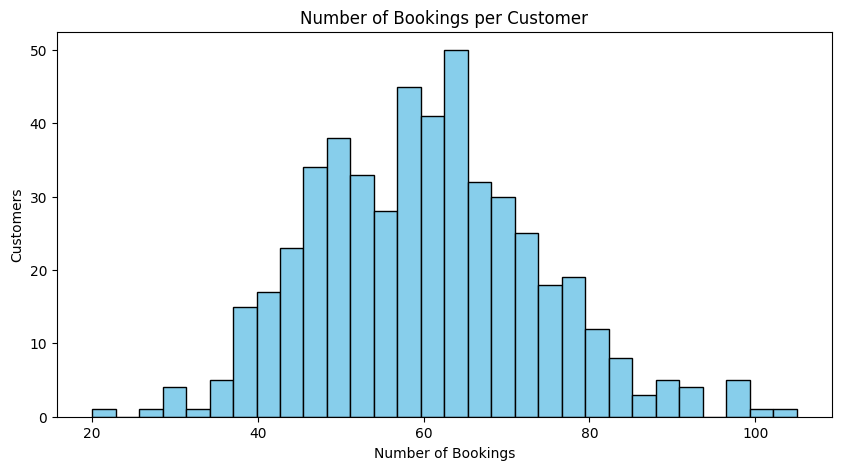

In [174]:
# Histogram for number of bookings per customer_id
if 'customer_id' in df.columns:
    booking_counts = df['customer_id'].value_counts()
    plt.figure(figsize=(10,5))
    plt.hist(booking_counts, bins=30, color='skyblue', edgecolor='black')
    plt.title('Number of Bookings per Customer')
    plt.xlabel('Number of Bookings')
    plt.ylabel('Customers')
    plt.show()
else:
    print("Column 'customer_id' not found in the dataset.")

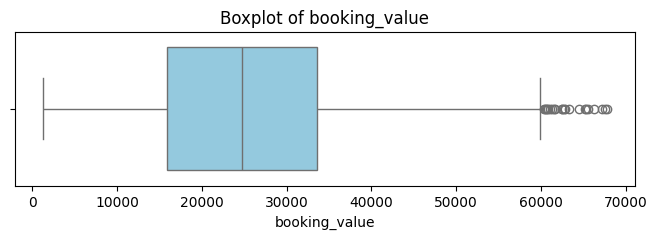

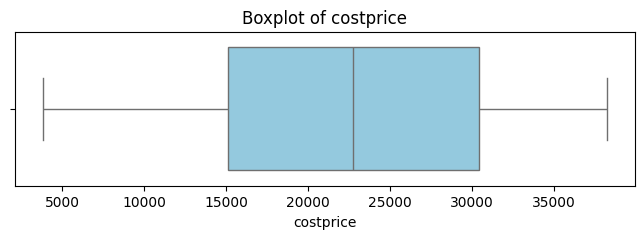

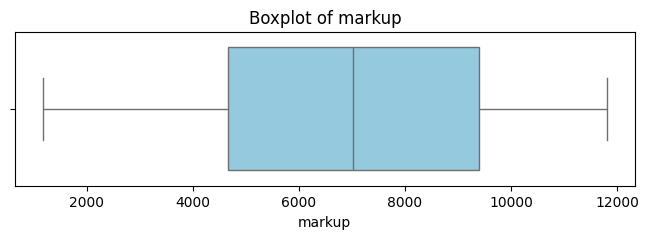

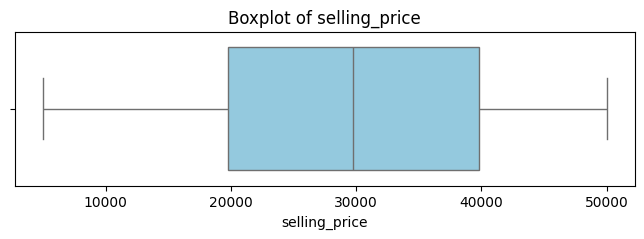

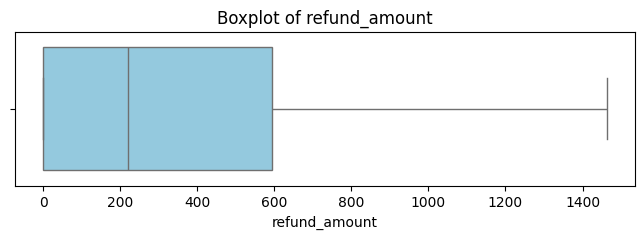

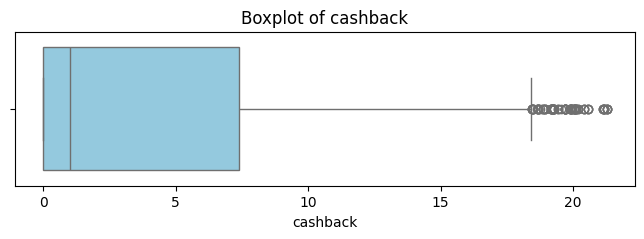

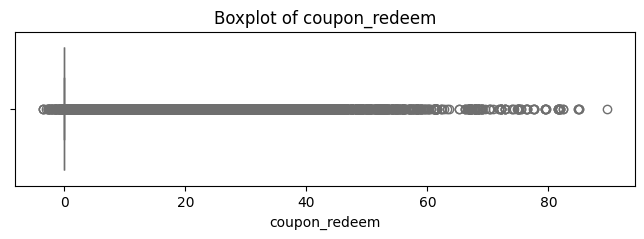

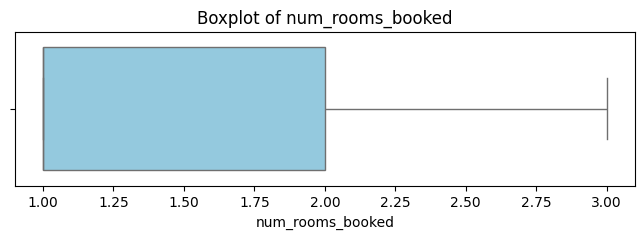

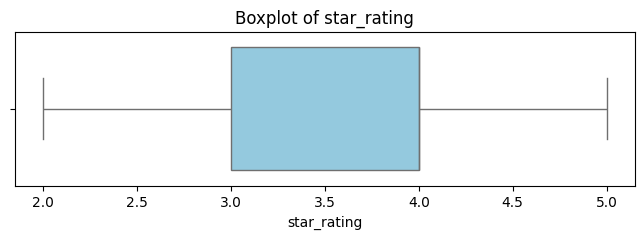

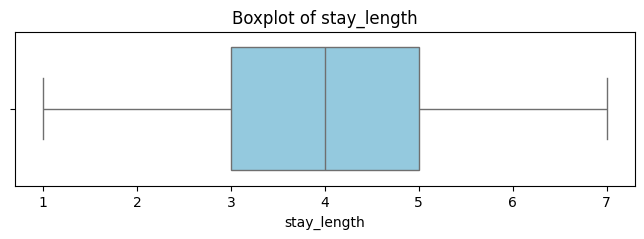

In [178]:
num_cols = [
    'booking_value', 'costprice', 'markup', 'selling_price', 'refund_amount',
    'cashback', 'coupon_redeem', 'num_rooms_booked', 'star_rating', 'stay_length'
]

for col in num_cols:
    if col in df.columns and pd.api.types.is_numeric_dtype(df[col]):
        plt.figure(figsize=(8, 2))
        sns.boxplot(x=df[col].dropna(), color='skyblue')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        plt.show()
    else:
        print(f"Column '{col}' not found or not numeric.")

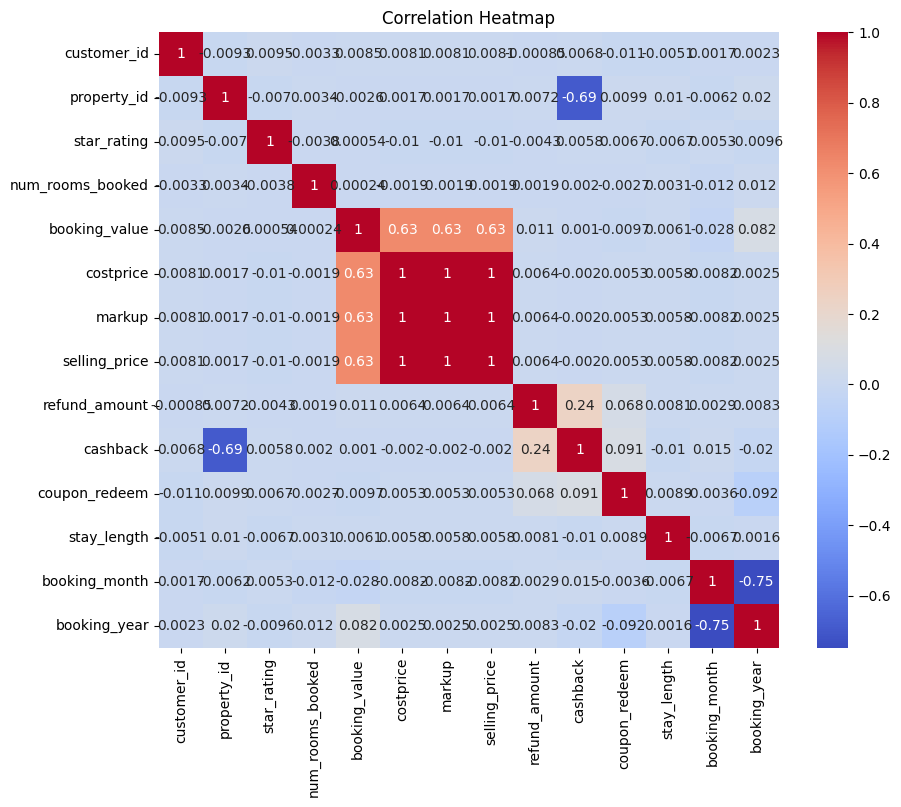

In [16]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

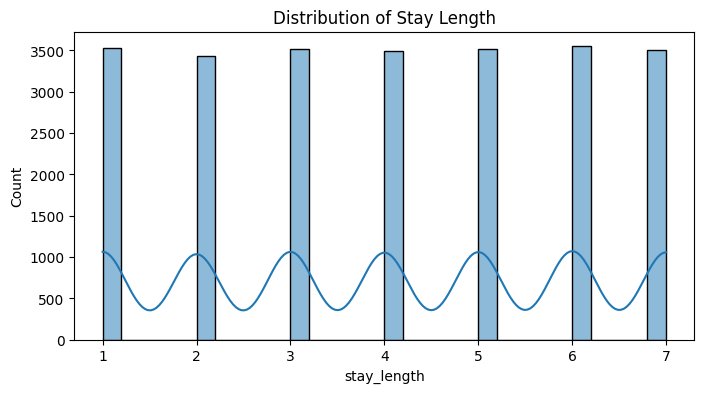

In [ ]:
# No. of times each customer_id appears (number of bookings per customer)
if 'customer_id' in df.columns:
    booking_counts = df['customer_id'].value_counts()
    print("Number of bookings per customer_id:")
    print(booking_counts)
    # New customers: booked only once
    new_customers = booking_counts[booking_counts == 1]
    print("\nCustomer IDs with only one booking (New customers):")
    print(new_customers)
    # Existing customers: booked more than once
    existing_customers = booking_counts[booking_counts > 1]
    print("\nCustomer IDs with more than one booking (Existing customers):")
    print(existing_customers)
    
    # Boxplot for number of bookings per customer
    plt.figure(figsize=(8,4))
    sns.boxplot(x=booking_counts.values)
    plt.title('Boxplot of Number of Bookings per Customer')
    plt.xlabel('Number of Bookings')
    plt.show()
else:
    print("Column 'customer_id' not found in the dataset.")

C:\Users\91911\AppData\Local\Temp\ipykernel_20088\1073632166.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df.set_index('booking_date').resample('M').size().plot(figsize=(10,4), title='Monthly Booking Trends')


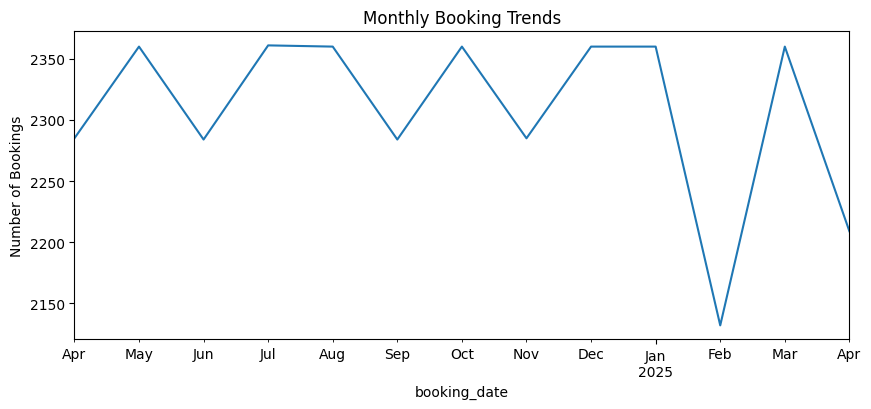

In [18]:
if 'booking_date' in df.columns:
    df.set_index('booking_date').resample('M').size().plot(figsize=(10,4), title='Monthly Booking Trends')
    plt.ylabel('Number of Bookings')
    plt.show()

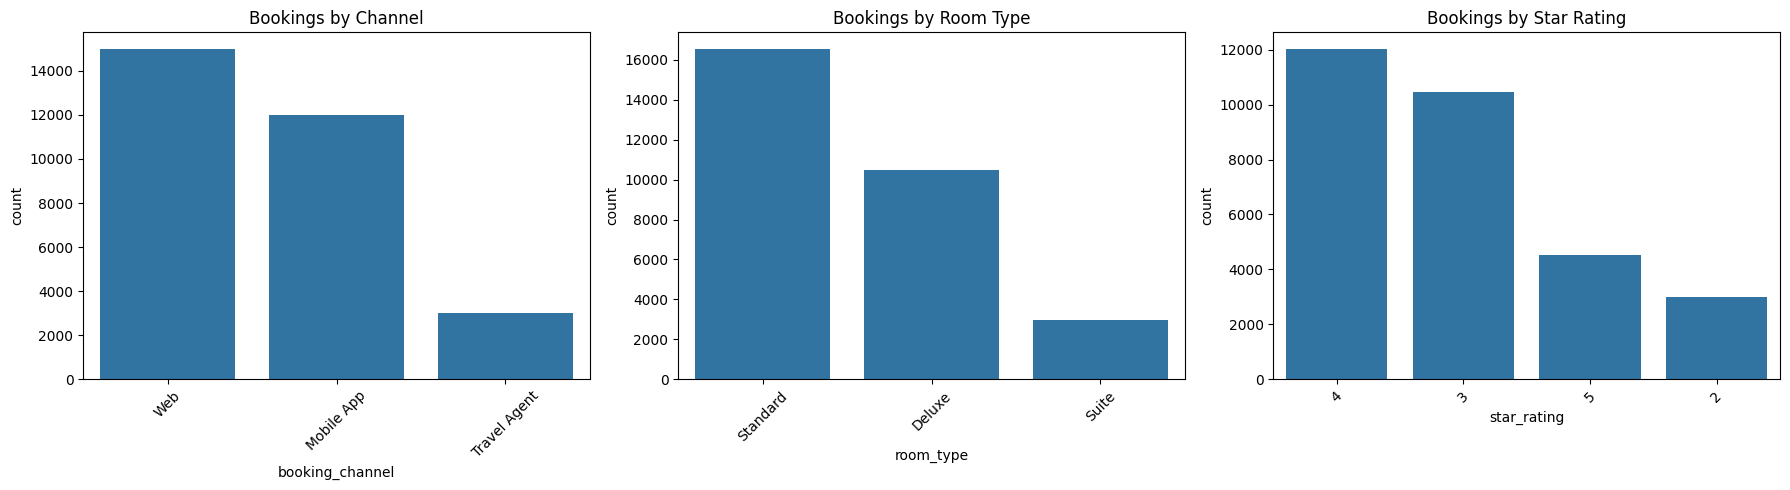

In [22]:
# Bookings by channel, room type, and star rating
fig, axes = plt.subplots(1, 3, figsize=(18,5))
if 'booking_channel' in df.columns:
    sns.countplot(data=df, x='booking_channel', order=df['booking_channel'].value_counts().index, ax=axes[0])
    axes[0].set_title('Bookings by Channel')
    axes[0].tick_params(axis='x', rotation=45)
if 'room_type' in df.columns:
    sns.countplot(data=df, x='room_type', order=df['room_type'].value_counts().index, ax=axes[1])
    axes[1].set_title('Bookings by Room Type')
    axes[1].tick_params(axis='x', rotation=45)
if 'star_rating' in df.columns:
    sns.countplot(data=df, x='star_rating', order=df['star_rating'].value_counts().index, ax=axes[2])
    axes[2].set_title('Bookings by Star Rating')
    axes[2].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

Identify Key Observations : 


1 - Highlight at least 3 meaningful trends or patterns in the data.


- There is a clear seasonality in bookings, with certain months. Highest in April and Lowest in February.Also the Cancellation rate is Highest in April and Lowest in November.
- Few customers are new (single booking), but a notable segment of existing customers (multiple bookings) exists, indicating some customer loyalty.
- The majority of bookings are concentrated in specific booking channels, room types, and star ratings, suggesting customer preferences for certain options.

2. Booking Patterns Across Channels, Room Types, and Star Ratings:

- Booking channels: Some channels are much more popular than others, as seen in the count plots and value counts. This could be due to better offers, user experience, or brand trust.
- Room types: Certain room types (e.g., Deluxe or Standard) are booked more frequently, indicating customer preference or availability.
- Star ratings: Bookings are skewed towards mid-range or specific star ratings, reflecting customer budget or quality expectations.

3. Cancellation Behavior:

- Cancellations are not evenly distributed; they are higher in months like April and for specific booking channels like web, room types like standard, and with 4 star ratings.
- Customers who use coupons or receive higher cashback amounts may have different cancellation rates, as shown by the analysis of coupon_used and cashback bins.
- The majority of cancellations are concentrated in a few segments, suggesting that targeted interventions (e.g., stricter policies or incentives) could reduce cancellations.

Root Cause Analysis

1. What might be the reasons for the observed cancellation patterns?
- Cancellations are higher in certain months (like April), possibly due to seasonal travel plans changing, holidays, or external factors (e.g., exams, weather).
- Specific booking channels (like web) and room types (like standard) have higher cancellations, which could be due to easier cancellation policies, less commitment, or more price-sensitive customers.
- Higher cancellations among coupon users or those receiving more cashback may indicate that discounts attract less committed or more price-sensitive customers.

2. Why do some booking channels or property types perform better than others?
- Some channels may offer better deals, user experience, or trust, leading to higher bookings and lower cancellations.
- Certain property types (e.g., deluxe rooms or specific star ratings) may align better with customer preferences, perceived value, or marketing efforts.
- Channels with stricter policies or loyalty programs may retain more bookings and reduce cancellations.

3. Are there seasonal or temporal trends influencing booking values or stay lengths?
- Yes, booking values and stay lengths show seasonality. Peak months (like April) have higher booking volumes and possibly longer stays, while off-peak months (like February or November) see fewer bookings and shorter stays.
- Holidays, festivals, and school vacations likely drive these trends, as do promotional campaigns and weather patterns.

Business Recommendations
1. Strategies to Reduce Cancellations:
- Implement stricter cancellation policies during peak months and for high-risk channels or room types, while maintaining flexibility for loyal customers.
- Use targeted communication (e.g., reminders, incentives) to encourage customers to retain bookings, especially those who used coupons or cashback offers.
- Analyze and address root causes of cancellations, such as unclear policies or lack of value, by improving transparency and customer support.

2. Ways to Improve Profitability and Increase Repeat Bookings:
- Launch loyalty programs and exclusive offers for existing customers to incentivize repeat bookings.
- Personalize marketing campaigns based on customer preferences, booking history, and seasonality to drive higher-value bookings.
- Upsell premium room types or value-added services (e.g., breakfast, late checkout) to increase average booking value.

3. Opportunities to Optimize Pricing, Promotions, or Channel Strategy:
- Use dynamic pricing models to adjust rates based on demand, seasonality, and booking lead time, maximizing revenue during peak periods.
- Optimize promotional spend by focusing on channels and customer segments with higher conversion and lower cancellation rates.
- Regularly review channel performance and renegotiate terms with underperforming partners, while investing in top-performing channels and digital marketing.